<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 10

Autor: Nicolás Burgos


### ENUNCIADO

1. Sea la función Inmitancia:

    \begin{equation} 
    F(s) = \frac{s^4 + 4s + 3}{s \cdot (s^2 + 2)}
    \end{equation}  

    Se pide hallar la topología circuital y los valores de los componentes para los siguientes casos:

    (a) Síntesis de $Z(s)$ mediante el método de Foster en su versión serie.

    (b) Síntesis de $Y(s)$ mediante el método de Foster en su versión derivación.

    (c) Síntesis de $Z(s)$ mediante el método de Cauer remoción en infinito.

    (d) Síntesis de $Z(s)$ mediante el método de Cauer remoción en DC.

    (e) Simular $Z(s)$ en LTSpice, observando los cambios de fase y la ley de variación ( pendiente ) de la impedancia del dipolo.

2. Sea el siguiente dipolo , pensandolo como una inmitancia $F_{12}$, se pide hallar el valor de los componentes sabiendo que satisface la función admitancia propuesta:

    \begin{equation} 
    Y(s) = \frac{s^5 + 18s^3 + 48s}{6s^4 + 42s^2 + 48}
    \end{equation}

    ![alt text](circuito_ej2.png)

3. Encuentre el valor de los elementos que integran el siguiente circuito y que satisface la función impedancia propuesta:

    \begin{equation} 
    Z(s) = \frac{s^2 + 6s + 8}{s^2 + 6s + 5}
    \end{equation}

    ![alt text](circuito_ej3.png)

4. Implementar en Python el punto 1 verificando los resultados usando las funciones de pytc2: *dibujar_foster_serie ; dibujar_foster_derivacion ; dibujar_cauer_LC*.
 
5. Realizar la simulación circuital del punto 2. Medir la admitancia y explicar comportamiento en DC.

### RESOLUCIÓN

#### PUNTO #1

**(a)** En este caso se pide interpretar la Función Inmitancia propuesta como una impedancia, por lo que en primer lugar la descomponemos según sus singularidades, polos y ceros, y la expresamos según la forma de Foster:

\begin{equation}
Z(s) = \frac{s^4 + 4s + 3}{s \cdot (s^2 + 2)} = \frac{(s^2 + 3) \cdot (s^2 + 1)}{s \cdot (s^2 + 2)}
\end{equation}

\begin{equation}
Z(s) = \frac{k_0}{s} + k_\infty s + \sum_i \frac{2k_i \cdot s}{s^2 + \omega_i^2} = \frac{k_0}{s} + k_\infty s + \frac{2k_1 \cdot s}{s^2 + 2}
\end{equation}

Al tener un solo par de polos complejos conjugados, tendremos un único circuito tanque LC en serie. De esta manera, se calculan los residuos de la expresión vista:

\begin{equation}
\boxed{k_0 = \lim_{s \to 0} s \cdot Z(s) = \frac{3}{2}}
\end{equation}

\begin{equation}
\boxed{k_\infty = \lim_{s \to \infty} \frac{Z(s)}{s} = 1}
\end{equation}

\begin{equation}
\boxed{2k_1 = \lim_{s^2 \to -2} Z(s) \cdot \frac{(s^2 + 2)}{s} = \frac{1}{2}}
\end{equation}

Así, el circuito resultante es el siguiente:

![alt text](circ_res_1a.png)

**(b)** Para encontrar el circuito correspondiente a la forma en derivación de Foster, $Y(s)$, solo basta con aplicar dualidad al resultado del inciso anterior. Los residuos serán los mismos, ya que la expresión de $Y(s)$ no cambia respecto a la de $Z(s)$, pero se deberán interpretar cada resultado y componente como admitancias, en lugar de impedancias. De esta manera tendremos los siguientes resultados:

\begin{equation}
Y(s) = \frac{s^4 + 4s + 3}{s \cdot (s^2 + 2)} = \frac{(s^2 + 3) \cdot (s^2 + 1)}{s \cdot (s^2 + 2)}
\end{equation}

\begin{equation}
Y(s) = \frac{k_0}{s} + k_\infty s + \sum_i \frac{2k_i \cdot s}{s^2 + \omega_i^2} = \frac{k_0}{s} + k_\infty s + \frac{2k_1 \cdot s}{s^2 + 2}
\end{equation}

\begin{equation}
\boxed{k_0 = \lim_{s \to 0} s \cdot Z(s) = \frac{3}{2}}
\end{equation}

\begin{equation}
\boxed{k_\infty = \lim_{s \to \infty} \frac{Z(s)}{s} = 1}
\end{equation}

\begin{equation}
\boxed{2k_1 = \lim_{s^2 \to -2} Z(s) \cdot \frac{(s^2 + 2)}{s} = \frac{1}{2}}
\end{equation}

![alt text](circ_res_1b.png)

**(c)** Para poder aplicar el método de Cauer, en este caso con remoción en $\infty$, será conveniente tener a la mano la siguiente expresión, donde *P* y *Q* son dos polinomios que representan numerador y denominador respectivamente, *C* es el cociente y *R* el resto de las divisiones.

\begin{equation}
F = \frac{P}{Q} = C + \frac{1}{\frac{Q}{R}}
\end{equation}

El método basicamente propone realizar la división entre P y Q, y luego proceder a dividir Q por el resto R obtenido, y así sucesivamente hasta llegar a resto cero. De esa forma, habremos descompuesto la función inmitancia según su forma canónica, en estructuras más simples que representan a los componentes de la red resultante. Para este caso, se obtendrá una red escalera, compuesta por inductores en serie y capacitores en derivación.

\begin{equation}
Z(s) =  \frac{s^4 + 4s + 3}{s^3 + 2s} = s + \frac{1}{\frac{s^3 + 2s}{2s^2 + 3}} = s + \frac{1}{\frac{1}{2}s + \frac{1}{\frac{2s^2 + 3}{\frac{1}{2}s}}} = s + \frac{1}{\frac{1}{2}s + \frac{1}{4s + \frac{1}{\frac{1}{6}s}}}
\end{equation}

El circuito resultante puede verse a continuación:

![alt text](circ_res_1c.png)

**(d)** En este punto, la idea es proceder de igual forma que en el inciso anterior, excepto que se debe cambiar la forma de ordenar los términos en la función impedancia propuesta. Así, podremos obtener una red compuesta por capacitores en serie e inductores en derivación, como resultado de realizar remociones sucesivas en continua, cero o DC.

\begin{equation}
Z(s) =  \frac{3 + 4s + s^4}{2s + s^3} = \frac{\frac{3}{2}}{s} + \frac{1}{\frac{2s + s^3}{\frac{5}{2}s^2 + s^4}} = \frac{\frac{3}{2}}{s} + \frac{1}{\frac{\frac{4}{5}}{s} + \frac{1}{\frac{\frac{5}{2}s^2 + s^4}{\frac{1}{5}s^3}}} = \frac{\frac{3}{2}}{s} + \frac{1}{\frac{\frac{4}{5}}{s} + \frac{1}{\frac{\frac{25}{2}}{s} + \frac{1}{\frac{\frac{1}{5}}{s}}}}
\end{equation}

El circuito resultante es el siguiente:

![alt text](circ_res_1d.png)

**(e)** Para esta parte se eligió simular el circuito resultante del inciso **(c)**, que corresponder a una red sintetizada a través del metodo de Cauer, con remoción en $\infty$. El circuito y resultado de la simulación se ven a continuación, separando los gráficos de módulo y fase.

![alt text](circ_sim_ej1.png)

![alt text](mod_sim_ej1.png)

![alt text](fase_sim_ej1.png)

Es posible observar que en los puntos donde la impedancia presenta picos, con cambios abruptos en magnitud, la fase presenta saltos aún más abruptos. 

Esto se debe, por un lado, a la presencia de polos y ceros, donde cada cruce provoca un salto de fase; cuando la impedancia total pasa de estar dominada por un inductor a un capacitor, y viceversa, la fase salta bruscamente entre +90° y -90°. 

Por otro lado, debido a que la red está compuesta en su totalidad por elementos reactivos, sin resistencias que suavicen los picos, el gráfico de módulo no presenta mesetas, sino grandes cambios de pendiente que provocan dichos picos.

#### PUNTO #2:

Para empezar a resolver este ejercicio, lo ideal es descomponet la función admitancia propuesta según sus polos y ceros, y luego proceder al método gráfico.

\begin{equation} 
Y(s) = \frac{s^5 + 18s^3 + 48s}{6s^4 + 42s^2 + 48} = \frac{s \cdot (s^2 + 3.26) \cdot (s^2 + 14.75)}{6 \cdot (s^2 + 1.44) \cdot (s^2 +)}
\end{equation}

![alt text](met_graf_ej2.png)

Del método gráfico se puede observar diferentes remociones que serán detalladas a continuación con cada paso. El primer paso es remover un capacitor en serie, por lo que se procedió a invertir la función $Y(s)$ dada, y luego realizar una remoción total en DC mediante el método de Cauer.

\begin{equation} 
Z(s) = \frac{6s^4 + 42s^2 + 48}{s^5 + 18s^3 + 48s}
\end{equation}

\begin{equation} 
Z(s) = Z_1(s) + Z_2(s) = \frac{1}{s} + \frac{1}{\frac{48s + 18s^3 + s^5}{24s^2 + 5s^4}} \quad ; \quad \boxed{Z_1(s) = \frac{1}{s}}
\end{equation}

\begin{equation} 
Z_2(s) = Z(s) - Z_1(s) = \frac{5s^3 + 24s}{s^4 + 18s^2 + 48} = \frac{5s \cdot (s^2 + \frac{24}{5})}{(s^2 + 3.26) \cdot (s^2 + 14.75)}
\end{equation}

Lo siguiente será retirar un inductor en derivación, por lo que lo más conveniente es invertir $Z_2(s)$ para obtener $Y_2(s)$ y realizar nuevamente una remoción total en DC por el método de Cauer, obteniendo lo siguiente:

\begin{equation} 
Y_2(s) = \frac{s^4 + 18s^2 + 48}{5s^3 + 24s}
\end{equation}

\begin{equation} 
Y_2(s) = Y_3(s) + Y_4(s) = \frac{2}{s} + \frac{1}{\frac{24s^2 + 5s^4}{8s^2 + s^4}} \quad ; \quad \boxed{Y_3(s) = \frac{2}{s}}
\end{equation}

\begin{equation} 
Y_4(s) = Y_2(s) - Y_3(s) = \frac{s^3 + 8s}{5s^2 + 24} = \frac{s \cdot (s^2 + 8)}{5 \cdot (s^2 + \frac{24}{5})}
\end{equation}

El siguiente paso será remover un circuito tanque LC en serie, así que invertimos $Y_4(s)$ para obtener $Z_4(s)$ y realizamos una remoción total en $s = \sqrt{8}$, buscando generar una cancelación cero-polo y que en dicho punto solo quede un valor propio de la función remanente. Haciendo esto, obtendremos una función impedancia final $Z_6(s)$, que representará el último elemento a sintetizar, que es un capacitor en serie.

\begin{equation} 
Z_4(s) = \frac{5s^2 + 24}{s^3 + 8s}
\end{equation}

\begin{equation} 
Z_6(s) = Z_4(s) - Z_5(s) \quad / \quad Z_5(s) = \frac{2k_5 \cdot s}{s^2 + 8}
\end{equation}

\begin{equation} 
2k_5 = \lim_{s^2 \to -8} Z_4(s) \cdot \frac{s^2 + 8}{s} = 2 \quad ; \quad \boxed{Z_5(s) = \frac{2 \cdot s}{s^2 + 8}}
\end{equation}

\begin{equation} 
\boxed{Z_6(s) = Z_4(s) - Z_5(s) = \frac{3}{s}}
\end{equation}

El circuito resultante de este análisis es el siguiente:

![alt text](circ_res_2.png)

#### PUNTO #3:

En este punto, debido a que los componentes a calcular se encuentran en serie, solo se trabajó con funciones impedancia. Será importante conocer los polos y ceros de $Z(s)$, así como también sus valores extremos, en DC y en $\infty$, para poder proceder con el método gráfico y los cálculos.

\begin{equation}
Z(s) = \frac{s^2 + 6s + 8}{s^2 + 6s + 5} = \frac{(s+2) \cdot (s+4)}{(s+1) \cdot (s+5)}
\end{equation}

\begin{equation}
Z(s)|_{s \to 0} = R_1 + R_3 = \frac{8}{5}
\end{equation}

\begin{equation}
Z(s)|_{s \to \infty} = R_1 + R_2 = 1
\end{equation}

![alt text](met_graf_ej3.png)

Lo primero será remover el primer circuito tanque, que resulta ser un RL. Esto lo haremos por medio de calcular el residuo en $s = -5$.

\begin{equation}
Z_2(s) = Z(s) - Z_1(s) \quad / \quad Z_1(s) = \frac{k_1 s}{s + 5}
\end{equation}

\begin{equation}
k_1 = \lim_{s \to -5} Z(s) \cdot \frac{s+5}{s} = \frac{3}{20} \quad ; \quad \boxed{Z_1(s) = \frac{\frac{3}{20} s}{s + 5}}
\end{equation}

\begin{equation}
Z_2(s) = Z(s) - Z_1(s) = \frac{\frac{17}{20} s + \frac{32}{20}}{s + 1} = \frac{\frac{17}{20} \cdot (s + \frac{32}{17})}{s + 1}
\end{equation}

Luego, se removerá el circuito tanque RC que está a continuación del anterior, por medio de realizar una remoción total en $s = -1$. Con esta remoción, obtendremos la expresión final de función impedancia, que no será otra cosa que la resistencia $R_1$ del circuito propuesto en el enunciado.

\begin{equation}
Z_4(s) = Z_2(s) - Z_3(s) \quad / \quad Z_3(s) = \frac{k_3}{s + 1}
\end{equation}

\begin{equation}
k_3 = \lim_{s \to -1} Z_2(s) \cdot (s+1) = \frac{3}{4} \quad ; \quad \boxed{Z_3(s) = \frac{\frac{3}{4}}{s + 1}}
\end{equation}

\begin{equation}
\boxed{Z_4(s) = Z_2(s) - Z_3(s) = \frac{17}{20}}
\end{equation}

Con esto, se llega a la siguiente red resultante, donde quedan verificados los valores extremos de la función impedancia $Z(s)$ mencionados más arriba.

![alt text](circ_res_3.png)

#### PUNTO #4:

Para la verificación del ejercicio **(1)**, se realizó la siguiente simulación, que verifica cada inciso. Por razón que se desconoce, la función "*dibujar_foster_derivación*" no logra dibujar el inductor del tanque serie, sino que dibuja una resistencia.

<IPython.core.display.Math object>

#### Foster Serie

<IPython.core.display.Math object>

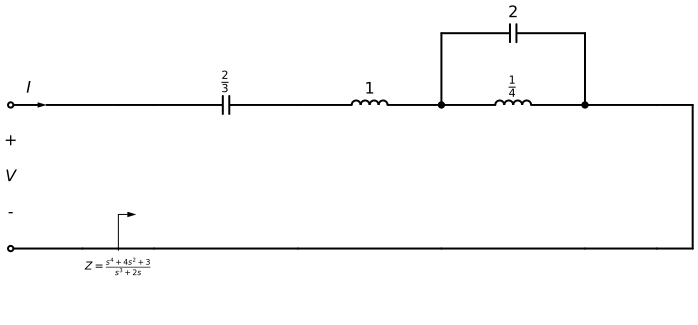

#### Foster Derivación

<IPython.core.display.Math object>

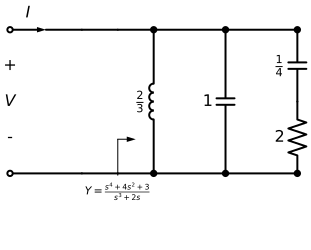

#### Cauer Remoción en Infinito

<IPython.core.display.Math object>

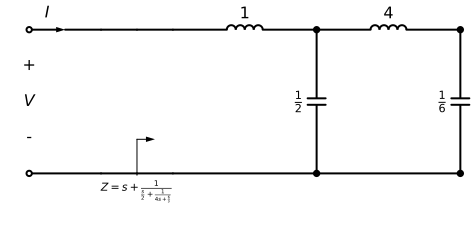

#### Cauer Remoción en DC

<IPython.core.display.Math object>

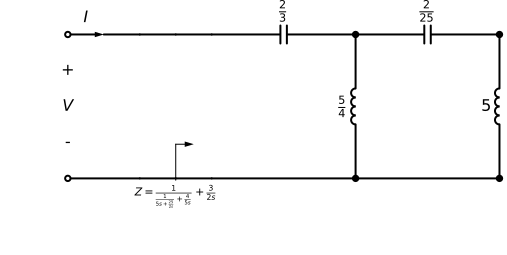

In [2]:
import sympy as sp

from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion, dibujar_cauer_LC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

from pytc2.general import s

FF = (1*s**4 + 4*s**2 + 3)/(1*s**3 + 2*s)

k0, koo, ki_wi, kk, FF_foster = foster(FF)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], FF_foster ))

# FOSTER SERIE

print_subtitle('Foster Serie')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)=F(s)', FF)[1:-1], FF_foster ))

dibujar_foster_serie(k0, koo, ki_wi, z_exc = FF)

# FOSTER DERIVACIÓN

print_subtitle('Foster Derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)=F(s)', FF)[1:-1], FF_foster ))

dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = FF)

# CAUER - REMOCIÓN EN INFINITO

print_subtitle('Cauer Remoción en Infinito')

koo, F_cauer_oo, rem = cauer_LC(FF, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_oo ))

dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

# CAUER - REMOCIÓN EN DC

print_subtitle('Cauer Remoción en DC')

k0, F_cauer_0, rem = cauer_LC(FF, remover_en_inf=False)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_0 ))

dibujar_cauer_LC(k0, z_exc = F_cauer_0)

#### PUNTO #5:

A continuación pueden observarse tanto el circuito simulado, como los resultados de módulo y fase de la admitancia. Puede observarse como en DC, la admitancia toma un valor muy cercano a los $0\Omega$, lo cual se debe a que el primer capacitor que se encuentra en serie, se comporta como un circuito abierto, cuya admitancia es nula. De todas formas, no es completamenta igual a cero, sino que tiene un pequeño valor remanente.

![alt text](circ_sim_ej3.png)

![alt text](mod_sim_ej3.png)

![alt text](fase_sim_ej3.png)